<a id='section5'></a>
# Index  
1. [***Load and Check Package versions***](#section1) 
2. [***Import data***](#section2) 
3. [***Single-Unit Analysis with STAR***](#section3) 
4. [***Saving the Notebook***](#section4)  
----------------  
  
----------------  


<a id='section1'></a>
## ***(1) Load and Check Package versions*** 
##### [back to top](#section5)

In [1]:
#load relevant packages
library("ggplot2")
library("STAR")
#set R plots for inline
options(jupyter.plot_mimetypes = 'image/png')

Loading required package: survival
Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-9. For overview type 'help("mgcv-package")'.
Loading required package: R2HTML
Loading required package: gss
Loading required package: codetools


In [2]:
# Which version of R is installed?
R.version.string

[1] "R version 3.2.2 (2015-08-14)"

In [3]:
# Which package versions are installed?
packages <- c("ggplot2", "STAR")
sapply(packages, packageDescription, fields = "Version")

ggplot2    STAR 
"1.0.1" "0.3-7"

<a id='section2'></a>
## ***(2) Import data***
##### [back to top](#section5)

We are using the data from *Cluster 0*, from  `Spike-Sorting.ipynb`

In [4]:
#import the spiketrain
timestamps = read.table("OUTPUT_FILES/times_unit2.txt", header = FALSE)

#extract the data from the first column of the dataframe
timestamps = timestamps$V1

<a id='section3'></a>
## ***(3) Single-Unit Analysis with STAR (Spike Train Analysis with R)***
##### [back to top](#section5)

STAR is an excellent library for the visualization and statistical analysis of spiketrains  
Here, we show only a few of the many functions included in this library.  

*For more information:*  
Pouzat, C. & Chaffiol, A. Automatic spike train analysis and report generation. An implementation with R, R2HTML and STAR. Journal of Neuroscience Methods 181, 119–144 (2009).

[STAR website](https://sites.google.com/site/spiketrainanalysiswithr/)


### Pre- and during stimulation  
**The balloon inflates to a volume of 4 ml from 60 to 90 seconds, and it is kept inflated for the rest of the time.**

pdf 
  2

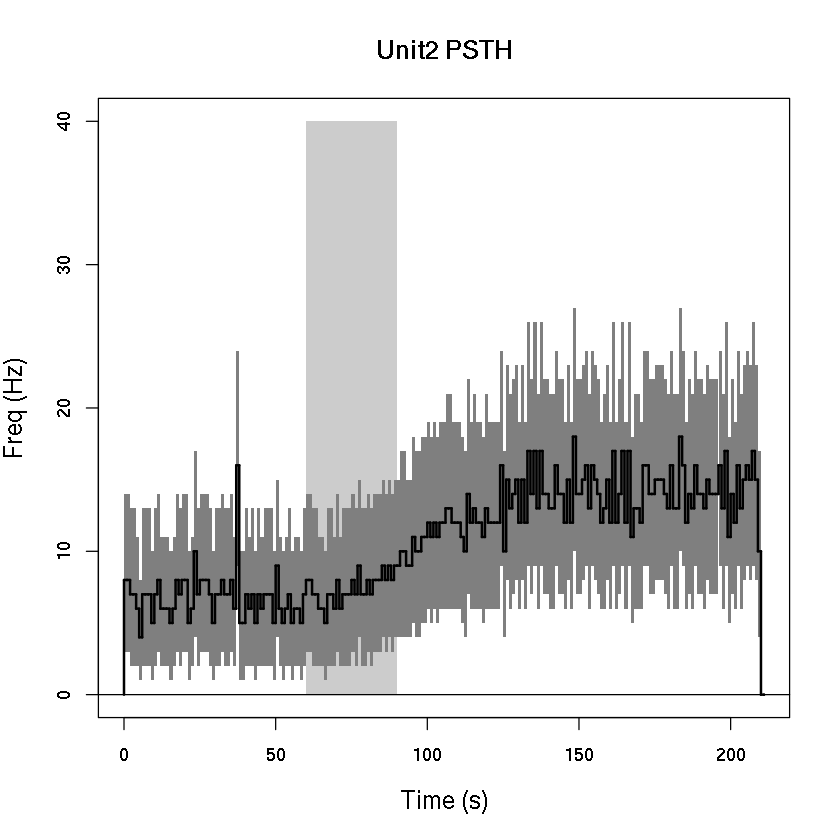

In [5]:
#generate peri-stimulus time histogram
Unit2 = as.repeatedTrain(timestamps)
svg("OUTPUT_FILES/psth.svg")
psth(Unit2, breaks = seq(0, 211, 1), colCI = "grey50", ylim = c(0, 40), stim = c(60, 90), cex.lab=1.2)
dev.off()
psth(Unit2, breaks = seq(0, 211, 1), colCI = "grey50", ylim = c(0, 40), stim = c(60, 90), cex.lab=1.2)

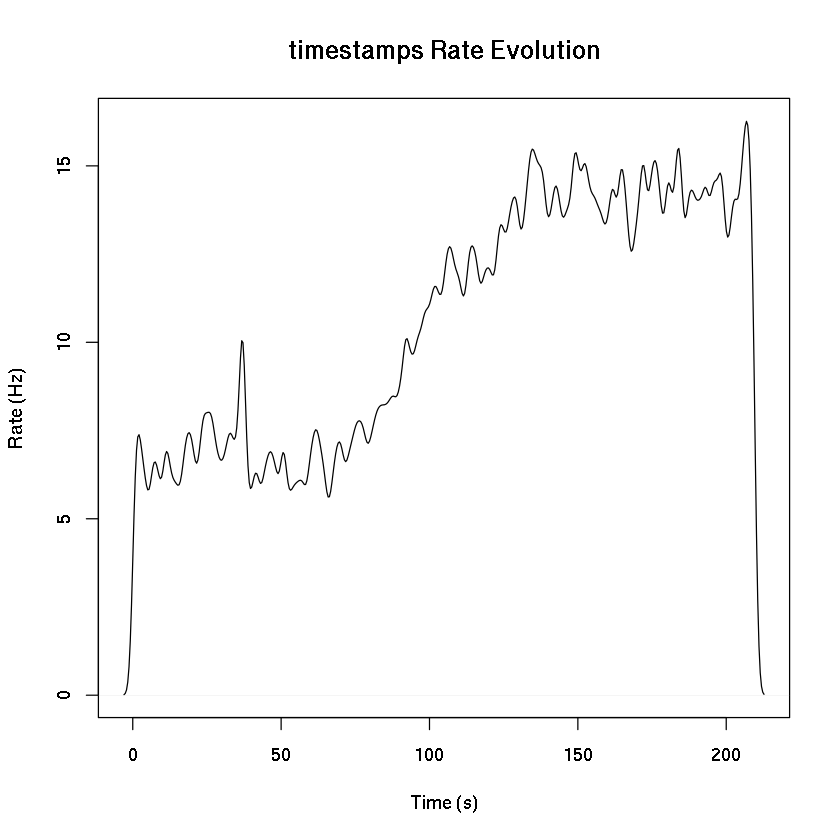

In [6]:
r = rateEvolution(timestamps)
plot(r)

pdf 
  2

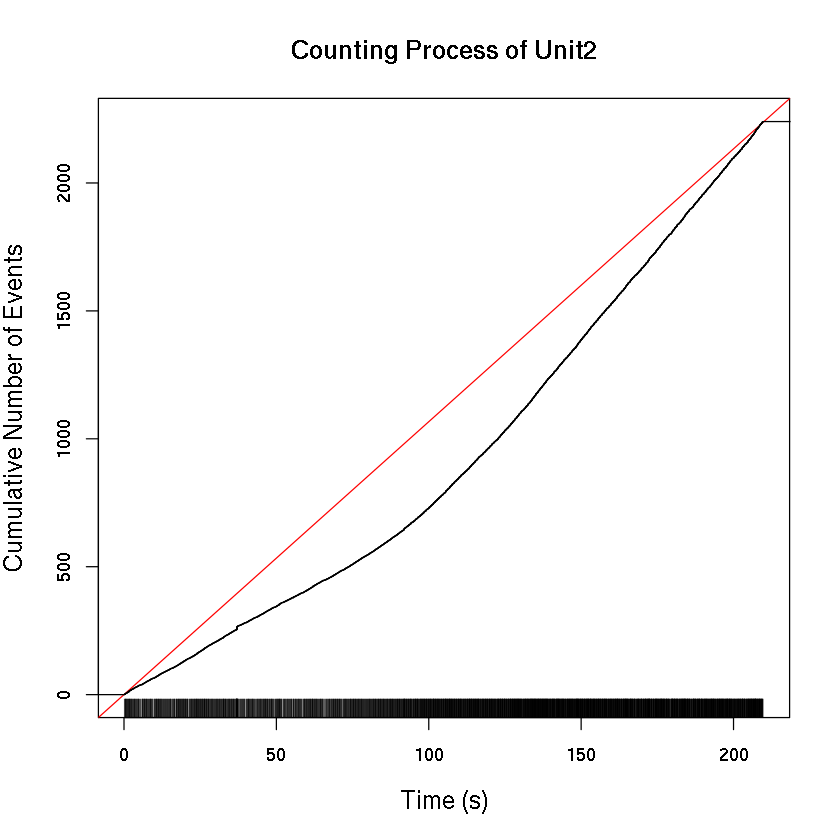

In [7]:
#Accumulated Events
Unit2 = as.spikeTrain(timestamps)
svg("OUTPUT_FILES/count.svg")
plot(Unit2, cex.lab=1.2)
dev.off()
plot(Unit2, cex.lab=1.2)

### Pre-stimulation (0 - 60 seconds) analysis

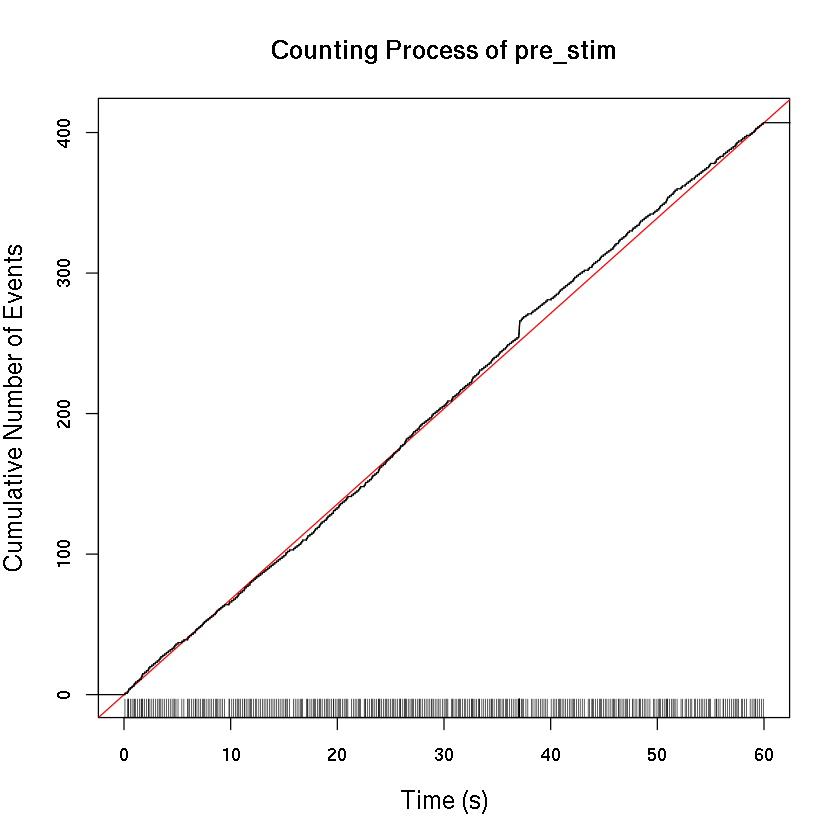

In [8]:
#Visualize accumulated events
pre_stim = as.spikeTrain(timestamps[timestamps < 60])
plot(pre_stim, cex.lab=1.2)

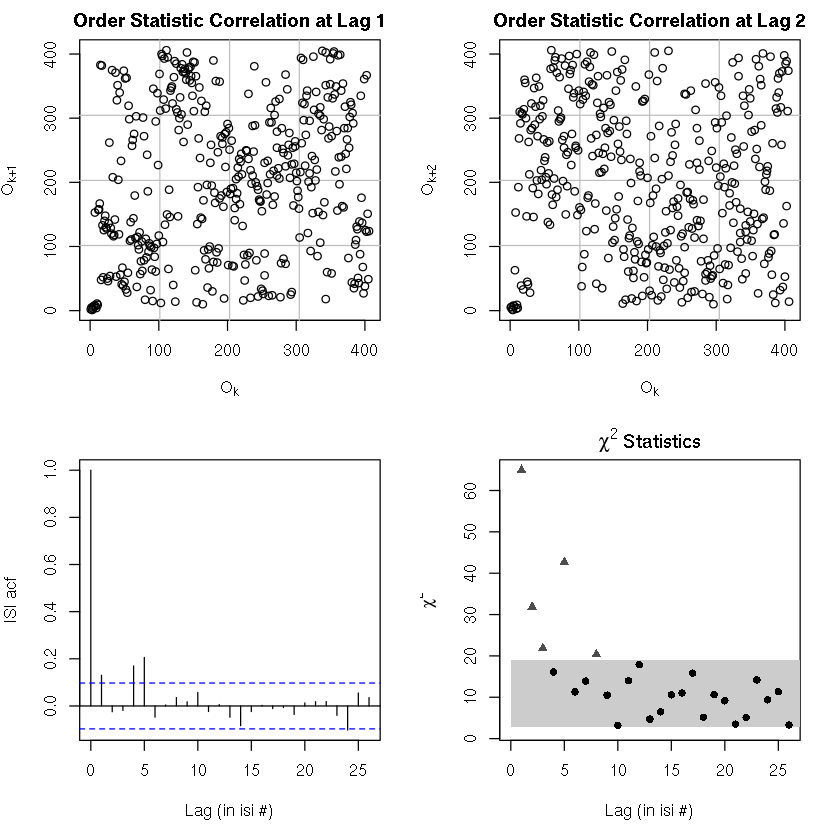

In [9]:
#Run some renewal tests
renewalTestPlot(pre_stim)

### During Stimulation (60 - 90 sec) analysis

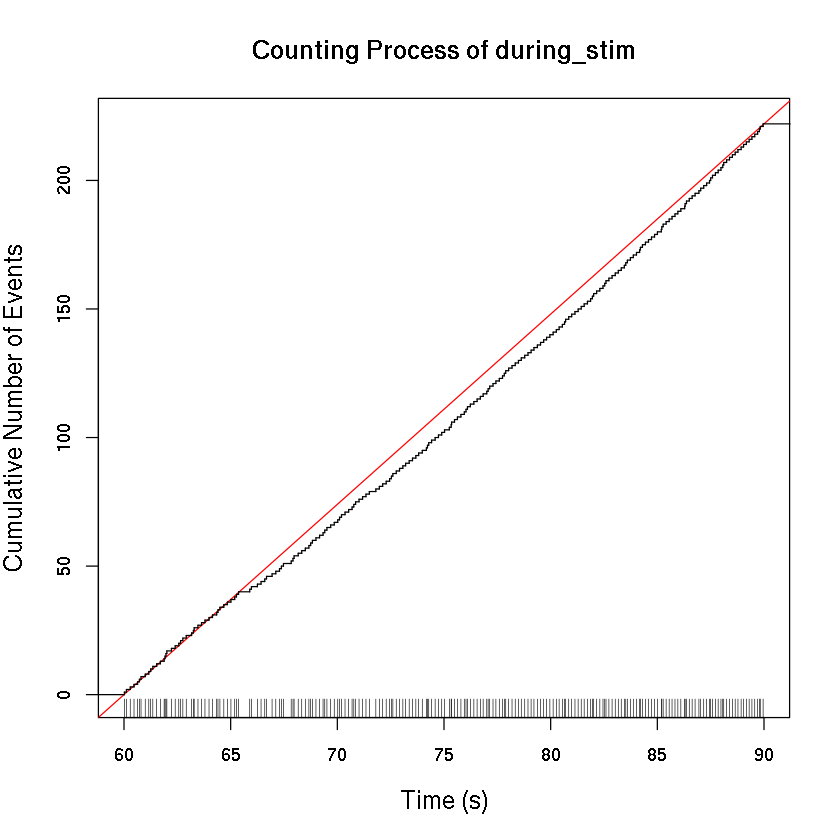

In [10]:
#Show the counting process again
during_stim = as.spikeTrain(timestamps[timestamps > 60 & timestamps < 90])
plot(during_stim, cex.lab=1.2)

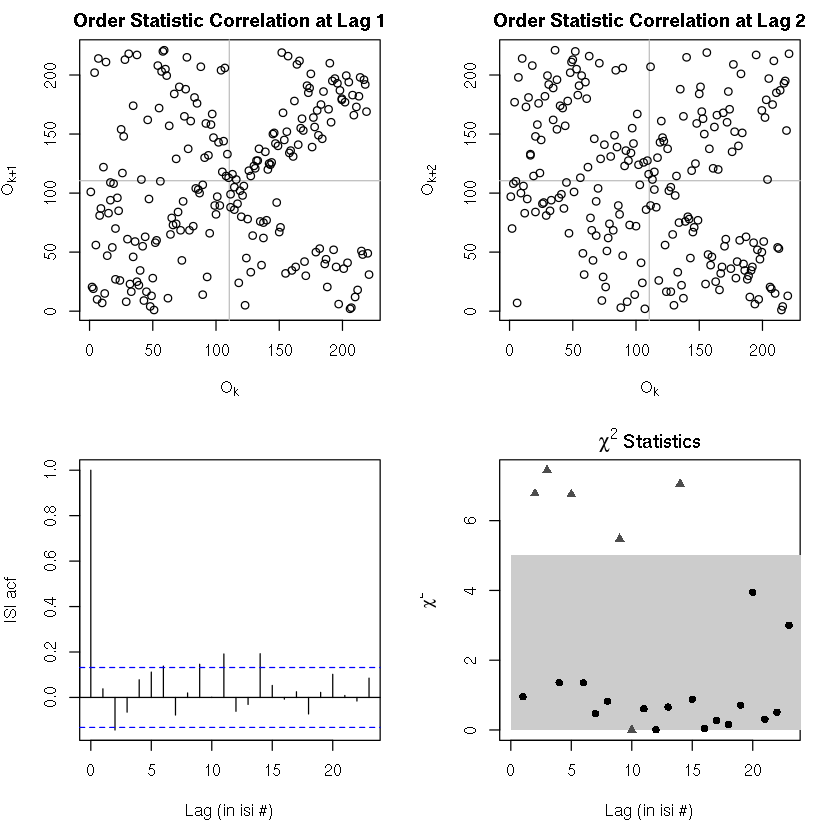

In [11]:
renewalTestPlot(during_stim)

### Comparison of pre-stim and during stimulation activity

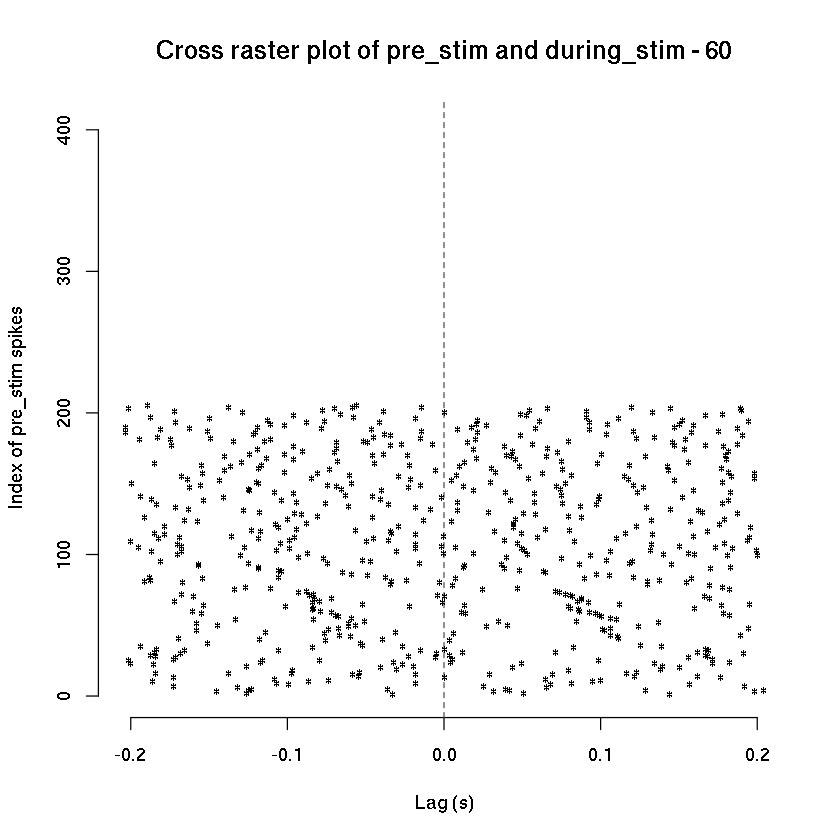

In [12]:
#Compare the activities of stimulation period vs pre-stim period
comparison = lockedTrain(pre_stim, during_stim - 60)
plot(comparison, cex.lab=1.2)

<a id='section4'></a>
## ***(4) Saving the Notebook***
##### [back to top](#section5)

In [13]:
try(system("jupyter nbconvert --to html Spiketrain-Analysis.ipynb", intern = TRUE))

character(0)